# Decision Tree
- 버섯의 특징을 활용해서 독/식용 버섯을 분류 : 이진분류
- Decicion Tree 시각화, 과대적합 제어

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

### 1 문제정의

### 2 데이터 수집

In [23]:
data = pd.read_csv('mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
#데이터 크기 확인용
data.shape

(8124, 23)

### 3 데이터 전처리
- 결측치, 이상치 확인

In [10]:
# 결측치 확인 ㅣ 결측치 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
# 이상치 확인
# 숫자가 아닌 데이터 -> 정해 놓은 범위가 없음 : 확인 불가능
data.describe()
# count : 컬럼의 전체 개수
# unique : 중복을 제거한 값의 갯수
# top : 빈도수가 많은 것
# freq : top값의 빈도 수 

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Dtype -> 모두 int, float 형으로 바꿔야 학습이 가능하다. 

In [12]:
# 컬럼별 값의 개수 카운트!
data['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

### 4 탐색적 데이터 분석
- 수치형데이터가 아니여서 생략

### 5 모델 선택 및 하이퍼파라미터 튜닝
- 문제와 정답으로 나누기
- 데이터를 수치형으로 바꾸기
- 훈련과 평가로 나누기


In [24]:
# 문제와 정답으로 나누기
X = data.loc[:,'cap-shape':]
y = data.loc[:,'poisonous']

In [ ]:
# 데이터를 수치형으로 바꾸기
# 1) Label 인코딩 (Map 함수) 하나의 값에 하나의 숫자를 대입

In [25]:
X1 = X.copy()  # 새로운 주소를 만든다. X1을 변경해도 X가 변경되지 않는다.
# X1 = X로 작업하면, X1에 있는 값을 변경하면 X도 변경된다
# 주소를 공유한다.

In [26]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [27]:
X1['cap-shape'] = X1['cap-shape'].map({'x':0,'b':3, 's':5, 'f':1, 'k':2, 'c':5})

In [28]:
X1['cap-shape']

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [ ]:
# 2) onehot인코딩

In [29]:
X2 = X.copy()

In [31]:
X_onehot = pd.get_dummies(X2)
X_onehot

# True = 1
# False = 0

# 각 컬럼의 값마다 컬럼 생성됨 : 원래 22-> 현재 117

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# 훈련과 학습 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, random_state=25, test_size =0.3)

In [35]:
# 모델 불러오기 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
# 파라미터를 조정하지 않아서 0이 될 때까지 진행 됨

### 6 학습

In [36]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

### 7 평가

In [37]:
# 결과가 1.0이라니!!!! 데이터가 잘못되었을 거다....
# 1. 데이터 중에서 정답과 너무 밀접한 데이터가 있을거다..!!!()
# 2. 정답을 맞출 수 밖에 없는 구조의 데이터
# 3. 만약 0.98 정도라면 --> 진짜 잘 됐을 수도 있겠다...!!

tree.score(X_test, y_test)
# 과대적합이 걸려있다!

1.0

In [39]:
tree.score(X_train, y_train)

1.0

In [ ]:
# Decision Tree : 질문들의 나열
# 어떤 질문들이 있는지를 확인한다!

### 시각화
- graphviz 라이브러리 : Decision Tree의 시각화를 도와주는 라이브러리 

In [40]:
!pip install graphviz

                                              0.0/47.0 kB ? eta -:--:--
     ----------------------------------       41.0/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00


In [44]:
# 시스템 환경 변수 설정
# 뭐라도 먹혀랴! (3개 다 설정)
# 시스템변수, 사용자 변수, 파이썬에서 지정
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [48]:
# 알고리즘을 파일로 만들기 
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=True, #불순도 표현
                #impurity=False, #불순도 속성을 표시하지 않겠다
               filled=True) #노드 안에 색 채우기

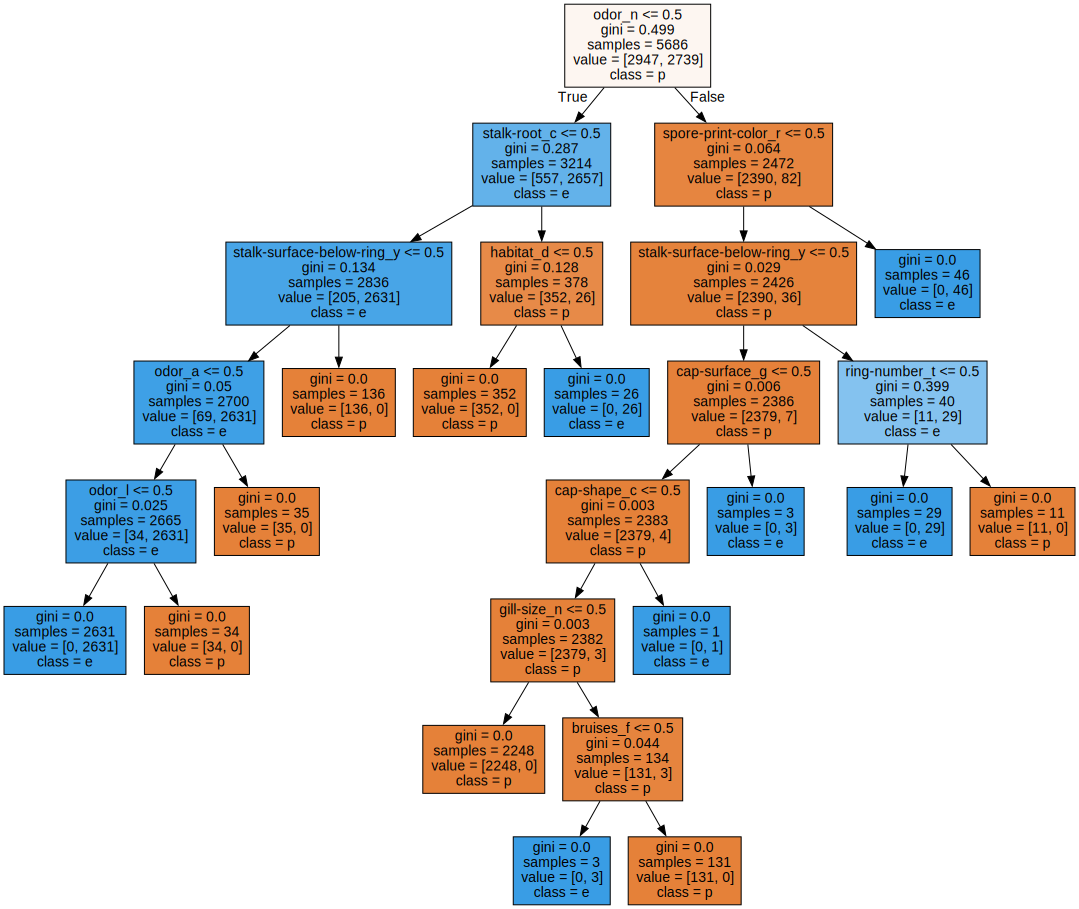

In [49]:
# 시각화 요청
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


In [50]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [ ]:
# 하이퍼 파라미터를 튜닝하면서 과대적합을 해소해보자
# 특성 선택(중요도를 확인)해보자!

In [51]:
# 깊이가 1인 모델
tree2 = DecisionTreeClassifier(max_depth=1)

In [52]:
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [53]:
from sklearn.tree import export_graphviz
export_graphviz(tree2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=True, #불순도 표현
                #impurity=False, #불순도 속성을 표시하지 않겠다
               filled=True) #노드 안에 색 채우기

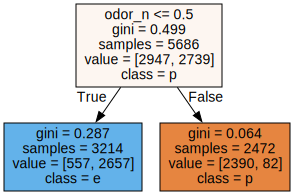

In [55]:
import graphviz

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


In [56]:
tree2.score(X_train, y_train)

0.8876187126275061

In [57]:
tree2.score(X_test, y_test)

0.8847415914684167

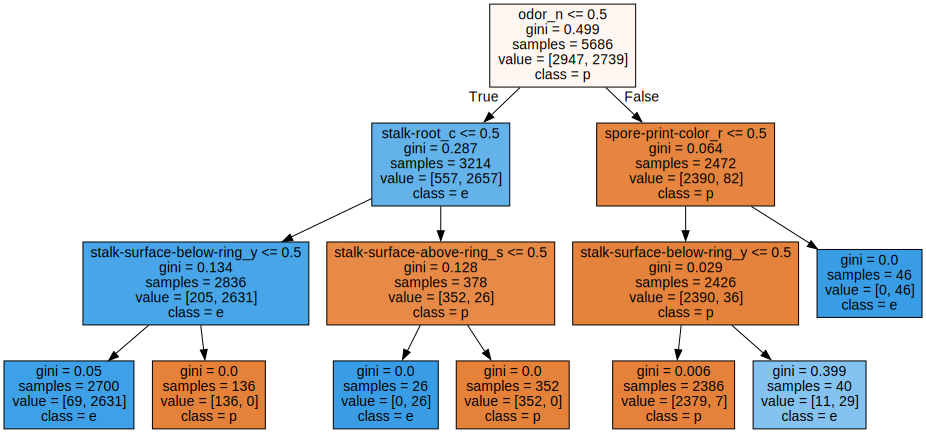

In [58]:
# 깊이가 3인 모델 

tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree3, out_file='tree3.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=True, #불순도 표현
                #impurity=False, #불순도 속성을 표시하지 않겠다
               filled=True) #노드 안에 색 채우기

import graphviz
with open('tree3.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [59]:
tree3.fit(X_train, y_train)

0.9864643150123051

In [60]:
tree3.fit(X_train, y_train)

0.984699261343651

## Cross validation

In [62]:
# 1) 전체 데이터 7:3으로 나누기 : 훈련과 검증 데이터
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, random_state=25, test_size =0.3)

In [ ]:
# 한 번의 검증으로는 부족하다!!!

## 교차검증(Cross Validation)

In [63]:
from sklearn.model_selection import cross_val_score

In [68]:
# (모델, 문제, 정답, cv=데이터 몇 개로 나눌지)
result = cross_val_score(tree2, X_train, y_train, cv=5)
result

array([0.89543058, 0.882146  , 0.87950748, 0.90149516, 0.87950748])

In [69]:
result.mean()

0.8876173385083614

## 특성선택
- tree 모델의 특성중요도 확인

In [71]:
# 부동소수형
fi = tree.feature_importances_
fi

array([0.00000000e+00, 7.02356768e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10353792e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.06596252e-03, 0.00000000e+00, 2.37182941e-02, 0.00000000e+00,
       0.00000000e+00, 2.36448868e-02, 0.00000000e+00, 6.19787062e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.46505639e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.73342250e-01, 0.00000000e+00, 0.00000000e+00,
      

In [77]:
# 모델의 특성 중요도와 특성 이름을 이용하여 데이터 프레임 생성
importance_df = pd.DataFrame(fi,index=X_train.columns, columns=['feature_name'])
# 내림차순으로 정렬
importance_df.sort_values(by='feature_name', ascending=False)

,feature_name
odor_n,0.619787
stalk-root_c,0.173342
stalk-surface-below-ring_y,0.101054
spore-print-color_r,0.030864
odor_a,0.023718
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000


In [78]:
importance_df.sort_values(by='feature_name', ascending=False).head(10)

,feature_name
odor_n,0.619787
stalk-root_c,0.173342
stalk-surface-below-ring_y,0.101054
spore-print-color_r,0.030864
odor_a,0.023718
odor_l,0.023645
habitat_d,0.017055
ring-number_t,0.005618
cap-surface_g,0.002104
bruises_f,0.002066


## 다양한 하이퍼파라미터 튜닝

In [80]:
tree4 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_leaf=30)

### Grid Search
- 다양한 하이퍼파라미터를 직접 돌리긴 복잡함 -? 그리드 서치!

In [81]:
from sklearn.model_selection import GridSearchCV

In [86]:
# 궁금한 파라미터 값들을 작성 => 딕셔너리 자료형 
params = {'max_depth':[3,5,7],
        'max_leaf_nodes': [5,7,9,11],
        'min_samples_leaf': [15, 30, 45] }
# 조합이 많을 수록 비용이 증가함

In [87]:
# (모델, 궁금한 파라미터, cv개수)
grid = GridSearchCV(tree, params, cv=3 )

In [88]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [5, 7, 9, 11],
                         'min_samples_leaf': [15, 30, 45]})

In [90]:
# 가장 좋은 조합의 점수 
grid.best_score_

0.9964823411969466

In [91]:
# 가장 높은 점수의 매개변수 조합!
grid.best_params_

{'max_depth': 7, 'max_leaf_nodes': 11, 'min_samples_leaf': 15}

In [92]:
# 가장 좋은 모델!
best_model = grid.best_estimator_

In [93]:
best_model.predict(X_test)

array(['e', 'p', 'e', ..., 'p', 'e', 'e'], dtype=object)